# Premiers modèles prédictifs du nombre de vélibs d'un point de vue spatial

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import linear_model
from math import sqrt

!pip install prettytable
from prettytable import PrettyTable

In [5]:
velib = pd.read_csv(r"/Users/Romain/Documents/Romain/ENSAE 2A 2020-2021/Stat'App/Github Stat'App/velib_clean.csv")
velib.head()

station_id               10/19/20;18:01:51               10/19/20;18:06:52  \
0   213688169   {'mechanical': 0, 'ebike': 2}   {'mechanical': 0, 'ebike': 2}   
1    99950133  {'mechanical': 41, 'ebike': 5}  {'mechanical': 41, 'ebike': 5}   
2   516709288   {'mechanical': 0, 'ebike': 1}   {'mechanical': 0, 'ebike': 1}   
3       36255   {'mechanical': 0, 'ebike': 0}   {'mechanical': 0, 'ebike': 0}   
4    37815204   {'mechanical': 4, 'ebike': 1}   {'mechanical': 3, 'ebike': 1}   

                10/19/20;18:11:52               10/19/20;18:16:52  \
0   {'mechanical': 0, 'ebike': 2}   {'mechanical': 0, 'ebike': 3}   
1  {'mechanical': 42, 'ebike': 5}  {'mechanical': 42, 'ebike': 7}   
2   {'mechanical': 0, 'ebike': 1}   {'mechanical': 1, 'ebike': 1}   
3   {'mechanical': 0, 'ebike': 0}   {'mechanical': 0, 'ebike': 0}   
4   {'mechanical': 1, 'ebike': 1}   {'mechanical': 1, 'ebike': 1}   

                10/19/20;18:21:52               10/19/20;18:26:53  \
0   {'mechanical': 0, 'ebike': 3}   {'mechanical': 1, 'ebike': 2}   
1  {'mechanical': 41, 'ebike': 5}  {'mechanical': 40, 'ebike': 4}   
2   {'mechanical': 1, 'ebike': 1}   {'mechanical': 1, 'ebike': 1}   
3   {'mechanical': 0, 'ebike': 2}   {'mechanical': 0, 'ebike': 4}   
4   {'mechanical': 2, 'ebike': 1}   {'mechanical': 3, 'ebike': 1}   

                10/19/20;18:31:53               10/19/20;18:36:53  \
0   {'mechanical': 0, 'ebike': 1}   {'mechanical': 0, 'ebike': 1}   
1  {'mechanical': 38, 'ebike': 5}  {'mechanical': 39, 'ebike': 4}   
2   {'mechanical': 2, 'ebike': 1}   {'mechanical': 0, 'ebike': 1}   
3   {'mechanical': 0, 'ebike': 4}   {'mechanical': 0, 'ebike': 4}   
4   {'mechanical': 3, 'ebike': 2}   {'mechanical': 2, 'ebike': 0}   

                10/19/20;18:41:54  ...              11/03/20;16:01:46  \
0   {'mechanical': 0, 'ebike': 1}  ...  {'mechanical': 4, 'ebike': 6}   
1  {'mechanical': 40, 'ebike': 5}  ...  {'mechanical': 2, 'ebike': 0}   
2   {'mechanical': 0, 'ebike': 1}  ...  {'mechanical': 1, 'ebike': 2}   
3   {'mechanical': 1, 'ebike': 3}  ...  {'mechanical': 0, 'ebike': 3}   
4   {'mechanical': 2, 'ebike': 0}  ...  {'mechanical': 6, 'ebike': 0}   

               11/03/20;16:06:47              11/03/20;16:11:47  \
0  {'mechanical': 4, 'ebike': 6}  {'mechanical': 3, 'ebike': 6}   
1  {'mechanical': 2, 'ebike': 0}  {'mechanical': 2, 'ebike': 0}   
2  {'mechanical': 1, 'ebike': 2}  {'mechanical': 1, 'ebike': 2}   
3  {'mechanical': 0, 'ebike': 3}  {'mechanical': 0, 'ebike': 3}   
4  {'mechanical': 7, 'ebike': 0}  {'mechanical': 7, 'ebike': 0}   

               11/03/20;16:16:47              11/03/20;16:21:48  \
0  {'mechanical': 4, 'ebike': 7}  {'mechanical': 5, 'ebike': 7}   
1  {'mechanical': 2, 'ebike': 1}  {'mechanical': 2, 'ebike': 1}   
2  {'mechanical': 1, 'ebike': 2}  {'mechanical': 1, 'ebike': 2}   
3  {'mechanical': 0, 'ebike': 3}  {'mechanical': 0, 'ebike': 2}   
4  {'mechanical': 7, 'ebike': 1}  {'mechanical': 7, 'ebike': 1}   

               11/03/20;16:26:48              11/03/20;16:31:48  \
0  {'mechanical': 5, 'ebike': 7}  {'mechanical': 5, 'ebike': 8}   
1  {'mechanical': 2, 'ebike': 0}  {'mechanical': 2, 'ebike': 0}   
2  {'mechanical': 1, 'ebike': 3}  {'mechanical': 1, 'ebike': 2}   
3  {'mechanical': 0, 'ebike': 2}  {'mechanical': 0, 'ebike': 3}   
4  {'mechanical': 8, 'ebike': 1}  {'mechanical': 9, 'ebike': 0}   

                11/03/20;16:36:49              11/03/20;16:41:49  \
0   {'mechanical': 5, 'ebike': 8}  {'mechanical': 5, 'ebike': 8}   
1   {'mechanical': 2, 'ebike': 0}  {'mechanical': 2, 'ebike': 0}   
2   {'mechanical': 1, 'ebike': 3}  {'mechanical': 1, 'ebike': 3}   
3   {'mechanical': 0, 'ebike': 3}  {'mechanical': 0, 'ebike': 3}   
4  {'mechanical': 10, 'ebike': 0}  {'mechanical': 9, 'ebike': 0}   

               11/03/20;16:46:49  
0  {'mechanical': 5, 'ebike': 7}  
1  {'mechanical': 2, 'ebike': 0}  
2  {'mechanical': 1, 'ebike': 3}  
3  {'mechanical': 0, 'ebike': 2}  
4  {'mechanical': 9, 'ebike': 0}  

[5 

### Mise en forme des données

In [6]:
# Création d'une fonction pour convertir le format des données en un dictionnaire.
def to_dictionary(jour):
    """transformer le format en dico"""
    try :
        dictionary = eval(jour)
    except:
        dictionary = {'mechanical': 0, 'ebike': 0}
    
    return dictionary

# Mise en forme du dataframe velib en mettant le nombre de vélos dans un dictionnaire
col_vide='[{}, {}]'
colonnes_vides=[]
for j in velib.columns:
    if velib[j][0]==col_vide:
        print(j)
        colonnes_vides.append(j)
velib=velib.drop(colonnes_vides,axis=1)

# On applique la fonction pour convertir en dictionnaire
longueur_du_dataframe = len(velib.iloc[1])
for i,j in enumerate(velib.columns[1:]):
    velib[j] = [to_dictionary(i) for i in velib[j]]

In [7]:
velib.head()

station_id               10/19/20;18:01:51               10/19/20;18:06:52  \
0   213688169   {'mechanical': 0, 'ebike': 2}   {'mechanical': 0, 'ebike': 2}   
1    99950133  {'mechanical': 41, 'ebike': 5}  {'mechanical': 41, 'ebike': 5}   
2   516709288   {'mechanical': 0, 'ebike': 1}   {'mechanical': 0, 'ebike': 1}   
3       36255   {'mechanical': 0, 'ebike': 0}   {'mechanical': 0, 'ebike': 0}   
4    37815204   {'mechanical': 4, 'ebike': 1}   {'mechanical': 3, 'ebike': 1}   

                10/19/20;18:11:52               10/19/20;18:16:52  \
0   {'mechanical': 0, 'ebike': 2}   {'mechanical': 0, 'ebike': 3}   
1  {'mechanical': 42, 'ebike': 5}  {'mechanical': 42, 'ebike': 7}   
2   {'mechanical': 0, 'ebike': 1}   {'mechanical': 1, 'ebike': 1}   
3   {'mechanical': 0, 'ebike': 0}   {'mechanical': 0, 'ebike': 0}   
4   {'mechanical': 1, 'ebike': 1}   {'mechanical': 1, 'ebike': 1}   

                10/19/20;18:21:52               10/19/20;18:26:53  \
0   {'mechanical': 0, 'ebike': 3}   {'mechanical': 1, 'ebike': 2}   
1  {'mechanical': 41, 'ebike': 5}  {'mechanical': 40, 'ebike': 4}   
2   {'mechanical': 1, 'ebike': 1}   {'mechanical': 1, 'ebike': 1}   
3   {'mechanical': 0, 'ebike': 2}   {'mechanical': 0, 'ebike': 4}   
4   {'mechanical': 2, 'ebike': 1}   {'mechanical': 3, 'ebike': 1}   

                10/19/20;18:31:53               10/19/20;18:36:53  \
0   {'mechanical': 0, 'ebike': 1}   {'mechanical': 0, 'ebike': 1}   
1  {'mechanical': 38, 'ebike': 5}  {'mechanical': 39, 'ebike': 4}   
2   {'mechanical': 2, 'ebike': 1}   {'mechanical': 0, 'ebike': 1}   
3   {'mechanical': 0, 'ebike': 4}   {'mechanical': 0, 'ebike': 4}   
4   {'mechanical': 3, 'ebike': 2}   {'mechanical': 2, 'ebike': 0}   

                10/19/20;18:41:54  ...              11/03/20;16:01:46  \
0   {'mechanical': 0, 'ebike': 1}  ...  {'mechanical': 4, 'ebike': 6}   
1  {'mechanical': 40, 'ebike': 5}  ...  {'mechanical': 2, 'ebike': 0}   
2   {'mechanical': 0, 'ebike': 1}  ...  {'mechanical': 1, 'ebike': 2}   
3   {'mechanical': 1, 'ebike': 3}  ...  {'mechanical': 0, 'ebike': 3}   
4   {'mechanical': 2, 'ebike': 0}  ...  {'mechanical': 6, 'ebike': 0}   

               11/03/20;16:06:47              11/03/20;16:11:47  \
0  {'mechanical': 4, 'ebike': 6}  {'mechanical': 3, 'ebike': 6}   
1  {'mechanical': 2, 'ebike': 0}  {'mechanical': 2, 'ebike': 0}   
2  {'mechanical': 1, 'ebike': 2}  {'mechanical': 1, 'ebike': 2}   
3  {'mechanical': 0, 'ebike': 3}  {'mechanical': 0, 'ebike': 3}   
4  {'mechanical': 7, 'ebike': 0}  {'mechanical': 7, 'ebike': 0}   

               11/03/20;16:16:47              11/03/20;16:21:48  \
0  {'mechanical': 4, 'ebike': 7}  {'mechanical': 5, 'ebike': 7}   
1  {'mechanical': 2, 'ebike': 1}  {'mechanical': 2, 'ebike': 1}   
2  {'mechanical': 1, 'ebike': 2}  {'mechanical': 1, 'ebike': 2}   
3  {'mechanical': 0, 'ebike': 3}  {'mechanical': 0, 'ebike': 2}   
4  {'mechanical': 7, 'ebike': 1}  {'mechanical': 7, 'ebike': 1}   

               11/03/20;16:26:48              11/03/20;16:31:48  \
0  {'mechanical': 5, 'ebike': 7}  {'mechanical': 5, 'ebike': 8}   
1  {'mechanical': 2, 'ebike': 0}  {'mechanical': 2, 'ebike': 0}   
2  {'mechanical': 1, 'ebike': 3}  {'mechanical': 1, 'ebike': 2}   
3  {'mechanical': 0, 'ebike': 2}  {'mechanical': 0, 'ebike': 3}   
4  {'mechanical': 8, 'ebike': 1}  {'mechanical': 9, 'ebike': 0}   

                11/03/20;16:36:49              11/03/20;16:41:49  \
0   {'mechanical': 5, 'ebike': 8}  {'mechanical': 5, 'ebike': 8}   
1   {'mechanical': 2, 'ebike': 0}  {'mechanical': 2, 'ebike': 0}   
2   {'mechanical': 1, 'ebike': 3}  {'mechanical': 1, 'ebike': 3}   
3   {'mechanical': 0, 'ebike': 3}  {'mechanical': 0, 'ebike': 3}   
4  {'mechanical': 10, 'ebike': 0}  {'mechanical': 9, 'ebike': 0}   

               11/03/20;16:46:49  
0  {'mechanical': 5, 'ebike': 7}  
1  {'mechanical': 2, 'ebike': 0}  
2  {'mechanical': 1, 'ebike': 3}  
3  {'mechanical': 0, 'ebike': 2}  
4  {'mechanical': 9, 'ebike': 0}  

[5 

In [154]:
type(velib['station_id'][2])

numpy.int64

In [155]:
def to_str(var):
    if type(var) is list:
        return str(var)[1:-1] # list
    if type(var) is np.ndarray:
        try:
            return str(list(var[0]))[1:-1] # numpy 1D array
        except TypeError:
            return str(list(var))[1:-1] # numpy sequence
    return str(var) # everything else

In [161]:
type(velib['station_id'][2])

numpy.int64

In [164]:
np.str(velib['station_id'][2])

'516709288'

In [167]:
toutes_les_stations = []
for i in range(len(velib)):
    toutes_les_stations.append(np.str(velib['station_id'][i]))

In [19]:
velib['10/19/20;18:01:51'][1]['mechanical']

41

# Prédiction du nombre de vélos à la date t+1 en entrainant l'algorithme à la date t : exemple du 1er novembre à 10h pour prédire le 2 novembre à 10h. 

In [12]:
tous_les_velibs = velib.copy()

D'abord, on ne considère que les colonnes correspondant au 1er novembre et au 2 novembre.

In [60]:
colonnest1 = ['station_id']
colonnest2 = ['station_id']
date1 = "11/01/20"
date2 = "11/02/20"

for i in tous_les_velibs:
    if (date1 in i):
        colonnest1.append(i)
    elif (date2 in i):
        colonnest2.append(i)

### On construit les 2 dataframes qui nous intéressent : **df1** à la date T et **df2** à la date T+1

In [113]:
df_t1 = velib[colonnest1].set_index('station_id').transpose()
df_t2 = velib[colonnest2].set_index('station_id').transpose()

In [114]:
df_t1.head()

station_id                             213688169  \
11/01/20;00:04:43  {'mechanical': 2, 'ebike': 4}   
11/01/20;00:09:43  {'mechanical': 2, 'ebike': 3}   
11/01/20;00:14:44  {'mechanical': 2, 'ebike': 3}   
11/01/20;00:19:44  {'mechanical': 2, 'ebike': 2}   
11/01/20;00:24:44  {'mechanical': 2, 'ebike': 2}   

station_id                              99950133   \
11/01/20;00:04:43  {'mechanical': 24, 'ebike': 6}   
11/01/20;00:09:43  {'mechanical': 25, 'ebike': 5}   
11/01/20;00:14:44  {'mechanical': 25, 'ebike': 5}   
11/01/20;00:19:44  {'mechanical': 25, 'ebike': 5}   
11/01/20;00:24:44  {'mechanical': 25, 'ebike': 5}   

station_id                             516709288  \
11/01/20;00:04:43  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:09:43  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:14:44  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:19:44  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:24:44  {'mechanical': 4, 'ebike': 9}   

station_id                             36255      \
11/01/20;00:04:43  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:09:43  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:14:44  {'mechanical': 4, 'ebike': 9}   
11/01/20;00:19:44  {'mechanical': 4, 'ebike': 8}   
11/01/20;00:24:44  {'mechanical': 4, 'ebike': 8}   

station_id                              37815204   \
11/01/20;00:04:43  {'mechanical': 22, 'ebike': 6}   
11/01/20;00:09:43  {'mechanical': 22, 'ebike': 6}   
11/01/20;00:14:44  {'mechanical': 22, 'ebike': 6}   
11/01/20;00:19:44  {'mechanical': 22, 'ebike': 6}   
11/01/20;00:24:44  {'mechanical': 22, 'ebike': 6}   

station_id                              100769544  \
11/01/20;00:04:43  {'mechanical': 25, 'ebike': 6}   
11/01/20;00:09:43  {'mechanical': 25, 'ebike': 6}   
11/01/20;00:14:44  {'mechanical': 25, 'ebike': 6}   
11/01/20;00:19:44  {'mechanical': 25, 'ebike': 6}   
11/01/20;00:24:44  {'mechanical': 25, 'ebike': 6}   

station_id                               85002689   \
11/01/20;00:04:43  {'mechanical': 17, 'ebike': 15}   
11/01/20;00:09:43  {'mechanical': 17, 'ebike': 15}   
11/01/20;00:14:44  {'mechanical': 17, 'ebike': 15}   
11/01/20;00:19:44  {'mechanical': 17, 'ebike': 15}   
11/01/20;00:24:44  {'mechanical': 17, 'ebike': 15}   

station_id                             54000559   \
11/01/20;00:04:43  {'mechanical': 3, 'ebike': 5}   
11/01/20;00:09:43  {'mechanical': 3, 'ebike': 5}   
11/01/20;00:14:44  {'mechanical': 3, 'ebike': 5}   
11/01/20;00:19:44  {'mechanical': 3, 'ebike': 5}   
11/01/20;00:24:44  {'mechanical': 3, 'ebike': 5}   

station_id                             85043758   \
11/01/20;00:04:43  {'mechanical': 1, 'ebike': 3}   
11/01/20;00:09:43  {'mechanical': 1, 'ebike': 3}   
11/01/20;00:14:44  {'mechanical': 1, 'ebike': 3}   
11/01/20;00:19:44  {'mechanical': 1, 'ebike': 3}   
11/01/20;00:24:44  {'mechanical': 1, 'ebike': 3}   

station_id                              123095125  ...  \
11/01/20;00:04:43  {'mechanical': 27, 'ebike': 1}  ...   
11/01/20;00:09:43  {'mechanical': 27, 'ebike': 1}  ...   
11/01/20;00:14:44  {'mechanical': 27, 'ebike': 1}  ...   
11/01/20;00:19:44  {'mechanical': 27, 'ebike': 1}  ...   
11/01/20;00:24:44  {'mechanical': 27, 'ebike': 1}  ...   

station_id                             125881065  \
11/01/20;00:04:43  {'mechanical': 4, 'ebike': 4}   
11/01/20;00:09:43  {'mechanical': 4, 'ebike': 4}   
11/01/20;00:14:44  {'mechanical': 4, 'ebike': 4}   
11/01/20;00:19:44  {'mechanical': 4, 'ebike': 4}   
11/01/20;00:24:44  {'mechanical': 4, 'ebike': 4}   

station_id                              54000627   \
11/01/20;00:04:43  {'mechanical': 19, 'ebike': 2}   
11/01/20;00:09:43  {'mechanical': 19, 'ebike': 2}   
11/01/20;00:14:44  {'mechanical': 19, 'ebike': 2}   
11/01/20;00:19:44  {'mechanical': 19, 'ebike': 2}   
11/01/20;00:24:44  {'mechanical': 19, 'ebike': 2}   

station_id                             15377776   \
11/01/20;00:04:43  {'mechanical': 3, 'ebike': 1}   
11/01/20;00:09:43  {'mechanical': 3, 'ebike': 1}   
11/01/20;00:14:4

### On s'intéresse ensuite au nombre total de vélos par stations :

In [115]:
# On parcourt les lignes et on ne garde que le nombre total de vélibs à l'heure souhaitée
for station in df_t1:
    for i in range(len(df_t1)):
        df_t1[station][i] = df_t1[station][i]['mechanical'] + df_t1[station][i]['ebike']
        df_t2[station][i] = df_t2[station][i]['mechanical'] + df_t2[station][i]['ebike']

In [116]:
df_t1.head()

station_id        213688169 99950133  516709288 36255     37815204  100769544  \
11/01/20;00:04:43         6        30        13        13        28        31   
11/01/20;00:09:43         5        30        13        13        28        31   
11/01/20;00:14:44         5        30        13        13        28        31   
11/01/20;00:19:44         4        30        13        12        28        31   
11/01/20;00:24:44         4        30        13        12        28        31   

station_id        85002689  54000559  85043758  123095125  ... 125881065  \
11/01/20;00:04:43        32         8         4        28  ...         8   
11/01/20;00:09:43        32         8         4        28  ...         8   
11/01/20;00:14:44        32         8         4        28  ...         8   
11/01/20;00:19:44        32         8         4        28  ...         8   
11/01/20;00:24:44        32         8         4        28  ...         8   

station_id        54000627  15377776  84961467  54000629  27415004  27415128   \
11/01/20;00:04:43        21         4        11        12        26        12   
11/01/20;00:09:43        21         4        11        12        26        12   
11/01/20;00:14:44        21         4        11        12        26        12   
11/01/20;00:19:44        21         4        11        12        26        11   
11/01/20;00:24:44        21         4        11        12        26        11   

station_id        27414937  66507230  100227241  
11/01/20;00:04:43        27         7        10  
11/01/20;00:09:43        27         7        10  
11/01/20;00:14:44        27         7        10  
11/01/20;00:19:44        27         7        10  
11/01/20;00:24:44        27         7        10  

[5 rows x 1398 columns]

In [117]:
df_t2.head()

station_id        213688169 99950133  516709288 36255     37815204  100769544  \
11/02/20;00:02:33         8        30        12         2        16        28   
11/02/20;00:07:33         8        30        11         2        16        28   
11/02/20;00:12:34         8        30        11         2        16        28   
11/02/20;00:17:34         8        30        11         2        16        28   
11/02/20;00:22:35         8        30        11         2        16        28   

station_id        85002689  54000559  85043758  123095125  ... 125881065  \
11/02/20;00:02:33        28        13         8        32  ...         5   
11/02/20;00:07:33        28        13         8        32  ...         5   
11/02/20;00:12:34        28        13         8        32  ...         5   
11/02/20;00:17:34        28        13         8        32  ...         5   
11/02/20;00:22:35        28        13         8        32  ...         5   

station_id        54000627  15377776  84961467  54000629  27415004  27415128   \
11/02/20;00:02:33        19         4        24        15        13        12   
11/02/20;00:07:33        19         4        24        15        13        12   
11/02/20;00:12:34        19         4        24        15        13        12   
11/02/20;00:17:34        19         4        24        15        13        12   
11/02/20;00:22:35        19         4        24        15        13        12   

station_id        27414937  66507230  100227241  
11/02/20;00:02:33        18        12        14  
11/02/20;00:07:33        18        12        14  
11/02/20;00:12:34        17        12        14  
11/02/20;00:17:34        17        12        14  
11/02/20;00:22:35        17        12        14  

[5 rows x 1398 columns]

In [118]:
# On reformate les données pour les manipuler
df_t1.reset_index(inplace=True)
df_t2.reset_index(inplace=True)

# On supprime les colonnes inutiles
df_t1 = df_t1.drop(['index'], axis = 1)
df_t2 = df_t2.drop(['index'], axis = 1)

# On convertit le nom des colonnes en string
df_t1.columns = toutes_les_stations
df_t2.columns = toutes_les_stations

In [170]:
df_t1.head()

213688169 99950133 516709288 36255 37815204 100769544 85002689 54000559  \
0         6       30        13    13       28        31       32        8   
1         5       30        13    13       28        31       32        8   
2         5       30        13    13       28        31       32        8   
3         4       30        13    12       28        31       32        8   
4         4       30        13    12       28        31       32        8   

  85043758 123095125  ... 125881065 54000627 15377776 84961467 54000629  \
0        4        28  ...         8       21        4       11       12   
1        4        28  ...         8       21        4       11       12   
2        4        28  ...         8       21        4       11       12   
3        4        28  ...         8       21        4       11       12   
4        4        28  ...         8       21        4       11       12   

  27415004 27415128 27414937 66507230 100227241  
0       26       12       27        7        10  
1       26       12       27        7        10  
2       26       12       27        7        10  
3       26       11       27        7        10  
4       26       11       27        7        10  

[5 rows x 1398 columns]

### Construction variable à prédire Y : une station random à la date t+1 i.e. le 2 novembre

On choisit aléatoirement la station numéro **213688169**, ce qui correspond à la station **Benjamin Godard - Victor Hugo** et qui dispose d'une capacité maximale de **35 vélibs**

#### Information sur les stations avec la table `station_information` : 
- capacity : nombre de bornettes dans la station
- lat : latitude de la station (au format WGS84)
- lon : longitude de la station (au format WGS84)
- name : nom de la station
- station_id : identifiant unique associé à la station. Ce numéro identifie la station au sein du service Vélib’ Métropole

In [120]:
import urllib.request
import json
from pandas.io.json import json_normalize

In [121]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info = df_station_info.sort_values(by = 'capacity', ascending = False)
df_station_info = df_station_info.reset_index()
df_station_info.head()

index  station_id                                   name        lat  \
0    891   389788858                 Emeriau - Beaugrenelle  48.847912   
1     52    85008390                   Grenelle - Dr Finlay  48.851315   
2    482    76199110              Université Paris Dauphine  48.870708   
3    796   100783424                     Censier - Santeuil  48.840659   
4   1315    54000610  Jean de la Fontaine - Boulainvilliers  48.852648   

        lon  capacity stationCode rental_methods  
0  2.284306        74       15030   [CREDITCARD]  
1  2.291950        71       15028   [CREDITCARD]  
2  2.274866        70       16004   [CREDITCARD]  
3  2.353752        69        5034   [CREDITCARD]  
4  2.275866        68       16025   [CREDITCARD]

In [122]:
df_station_info[df_station_info['station_id'] == 213688169]

index  station_id                           name        lat       lon  \
441      0   213688169  Benjamin Godard - Victor Hugo  48.865983  2.275725   

     capacity stationCode rental_methods  
441        35       16107            NaN

### Création du df pour le ML

In [173]:
df_y = df_t2[['213688169']]
df_y.columns = ['y']
df_y.head()

y
0  8
1  8
2  8
3  8
4  8

On ajoute cette colonne au dataframe de toutes les stations à la date t : 

In [174]:
df_ml = pd.concat([df_t1, df_y], axis = 1)
df_ml

213688169 99950133 516709288 36255 37815204 100769544 85002689 54000559  \
0           6       30        13    13       28        31       32        8   
1           5       30        13    13       28        31       32        8   
2           5       30        13    13       28        31       32        8   
3           4       30        13    12       28        31       32        8   
4           4       30        13    12       28        31       32        8   
..        ...      ...       ...   ...      ...       ...      ...      ...   
281         8       30        12     2       16        28       28       13   
282         8       30        12     2       16        28       28       13   
283         8       30        12     2       16        28       28       13   
284         8       30        12     2       16        28       28       13   
285         8       30        12     2       16        28       28       13   

    85043758 123095125  ... 54000627 15377776 84961467 54000629 27415004  \
0          4        28  ...       21        4       11       12       26   
1          4        28  ...       21        4       11       12       26   
2          4        28  ...       21        4       11       12       26   
3          4        28  ...       21        4       11       12       26   
4          4        28  ...       21        4       11       12       26   
..       ...       ...  ...      ...      ...      ...      ...      ...   
281        8        30  ...       19        4       24       15       13   
282        8        30  ...       19        4       24       15       13   
283        8        30  ...       19        4       24       15       13   
284        8        30  ...       19        4       24       15       13   
285        8        31  ...       19        4       24       15       13   

    27415128 27414937 66507230 100227241  y  
0         12       27        7        10  8  
1         12       27        7        10  8  
2         12       27        7        10  8  
3         11       27        7        10  8  
4         11       27        7        10  8  
..       ...      ...      ...       ... ..  
281       12       19       12        15  9  
282       12       19       12        14  8  
283       12       19       12        14  9  
284       12       18       12        14  9  
285       12       18       12        14  9  

[286 rows x 1399 columns]

### Sélection des features

In [268]:
df_ml = df_ml.astype('float64')

In [269]:
df_ml.corr()

213688169  99950133  516709288     36255  37815204  100769544  \
213688169   1.000000  0.180946  -0.029903 -0.270653 -0.357012  -0.258148   
99950133    0.180946  1.000000   0.738871  0.583496  0.233941  -0.140385   
516709288  -0.029903  0.738871   1.000000  0.719678  0.422147  -0.274146   
36255      -0.270653  0.583496   0.719678  1.000000  0.277324   0.175037   
37815204   -0.357012  0.233941   0.422147  0.277324  1.000000  -0.205415   
...              ...       ...        ...       ...       ...        ...   
27415128    0.022102 -0.303547  -0.320279 -0.607614  0.431948  -0.333889   
27414937   -0.292475  0.553276   0.645915  0.904185  0.231951   0.194788   
66507230    0.125049 -0.683817  -0.723503 -0.920466 -0.171470  -0.143010   
100227241   0.328254 -0.356078  -0.499214 -0.753756 -0.202907  -0.214869   
y           0.157214  0.472200   0.580020  0.287044  0.152608  -0.552218   

           85002689  54000559  85043758  123095125  ...  54000627  15377776  \
213688169 -0.365987  0.273324  0.384876   0.106682  ... -0.381281 -0.419914   
99950133   0.512620  0.072574 -0.491756   0.528778  ... -0.098404 -0.417694   
516709288  0.677085 -0.164184 -0.601327   0.604564  ... -0.084724 -0.492212   
36255      0.863245 -0.016605 -0.769908   0.483026  ...  0.388534 -0.040605   
37815204   0.236450 -0.760486 -0.391186   0.204852  ...  0.073949 -0.256306   
...             ...       ...       ...        ...  ...       ...       ...   
27415128  -0.598943 -0.540620  0.474210  -0.101894  ... -0.317914 -0.185179   
27414937   0.880574  0.038571 -0.776625   0.402418  ...  0.438887  0.010787   
66507230  -0.815357 -0.094431  0.722509  -0.440557  ... -0.279026  0.113021   
100227241 -0.763040  0.041567  0.512998  -0.336517  ... -0.310991  0.035677   
y          0.363425 -0.206036 -0.093115   0.692784  ... -0.372100 -0.398853   

           84961467  54000629  27415004  27415128  27414937  66507230  \
213688169  0.335322  0.246529 -0.366259  0.022102 -0.292475  0.125049   
99950133  -0.454738 -0.632456  0.494729 -0.303547  0.553276 -0.683817   
516709288 -0.784323 -0.698533  0.768792 -0.320279  0.645915 -0.723503   
36255     -0.818509 -0.851621  0.687772 -0.607614  0.904185 -0.920466   
37815204  -0.330000 -0.221910  0.763226  0.431948  0.231951 -0.171470   
...             ...       ...       ...       ...       ...       ...   
27415128   0.521242  0.520720 -0.068411  1.000000 -0.625361  0.627874   
27414937  -0.780415 -0.810494  0.633764 -0.625361  1.000000 -0.863036   
66507230   0.719594  0.810159 -0.573915  0.627874 -0.863036  1.000000   
100227241  0.680801  0.642665 -0.567692  0.456922 -0.741260  0.691127   
y         -0.370746 -0.465831  0.493329 -0.088278  0.258885 -0.268794   

           100227241         y  
213688169   0.328254  0.157214  
99950133   -0.356078  0.472200  
516709288  -0.499214  0.580020  
36255      -0.753756  0.287044  
37815204   -0.202907  0.152608  
...              ...       ...  
27415128    0.456922 -0.088278  
27414937   -0.741260  0.258885  
66507230    0.691127 -0.268794  
100227241   1.000000 -0.233544  
y          -0.233544  1.000000  

[1399 rows x 1399 columns]

In [245]:
def choix_features(heatmap, target, seuil):
    """
    heatmap : matrice de corrélation
    target : variable à prédire (output)
    seuil : seuil minimum à partir duquel on accepte une variable dans la modélisation (en valeur absolue)
    Fonction qui renvoie la liste des features sélectionnées pour la modélisation
    """
    features = []
    variables = list(heatmap)
    for i in range(len(heatmap)-1):
        if abs(heatmap[target][i]) > seuil:
            features.append(variables[i])
    return features

In [280]:
# On l'applique à notre jeu de données
features = choix_features(df_ml.corr(),'y',0.6)
features

['123095125',
 '54000612',
 '88230992',
 '506455295',
 '101740379',
 '129088667',
 '1057228658',
 '210582921',
 '102290754',
 '54000569',
 '336511521',
 '27363489',
 '42603855',
 '27415466',
 '583171360',
 '82387816',
 '613737748',
 '245187072',
 '27415665',
 '1765749389',
 '213992316',
 '213694482',
 '35908',
 '210573120',
 '213688824',
 '1062223873',
 '568135465',
 '214102967',
 '473204291',
 '27399735',
 '129125489',
 '129077035',
 '35196898',
 '37521',
 '653129412',
 '254224239',
 '10968855',
 '27246227',
 '653059015',
 '27363137',
 '7304',
 '129042700',
 '120827885',
 '315525484',
 '249554935',
 '27363256',
 '129161858',
 '1036226943',
 '66505513',
 '41610121',
 '1599931563',
 '124390478',
 '392576677',
 '287096529',
 '38319086',
 '35147530',
 '96512532',
 '653125838',
 '1057179405',
 '653080383',
 '6295',
 '1057045129',
 '85155919',
 '369011098',
 '389788858',
 '653083263',
 '15212034',
 '1057730786',
 '210395439',
 '82336035',
 '1057737444',
 '285001735',
 '36391',
 '100934967',

In [281]:
len(features)

103

In [249]:
len(df_t1)

286

### Régression linéaire

In [285]:
X = df_ml.loc[:,features]
Y = df_ml.loc[:,'y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [286]:
# Machine Learning : Régression linéaire simple
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
y_prediction = np.round(y_prediction)

print(sqrt(mean_squared_error(y_test, y_prediction)))

0.8212299340934686


Text(0, 0.5, 'Nombre prédit de vélibs disponibles dans la station choisie')

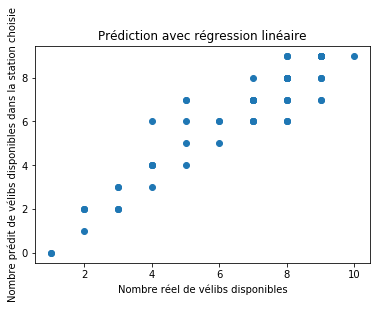

In [287]:
plt.scatter(y_test,y_prediction)
plt.title("Prédiction avec régression linéaire")
plt.xlabel("Nombre réel de vélibs disponibles")
plt.ylabel("Nombre prédit de vélibs disponibles dans la station choisie")

Text(0.5, 15.0, 'Qualité prédite')

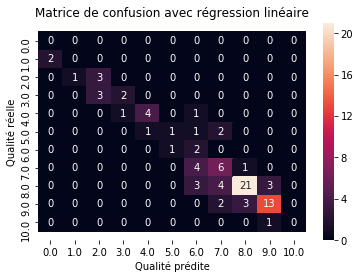

In [291]:
cm_regression = confusion_matrix(y_test,y_prediction)
cm = pd.DataFrame(cm_regression, index = np.linspace(0,10,11), columns = np.linspace(0,10,11))
ax = sns.heatmap(cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Matrice de confusion avec régression linéaire")
plt.ylabel('Qualité réelle')
plt.xlabel('Qualité prédite')

In [292]:
precision_score(y_test, y_prediction, average = 'weighted')

0.6709044125049597

Précision du modèle de 0.67. En gros 2/3 des prédictions sont bonnes pour cette station vélib

In [293]:
recall_score(y_test, y_prediction, average = 'weighted')

0.6046511627906976

# Pour la réunion Statapp du 29 mars 

Cette fois, les données vont du 19 octobre 2020 au 15 février 2021, avec un éhantillonnage toutes les heures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
velib = pd.read_csv(r"/Users/Romain/Documents/Romain/ENSAE 2A 2020-2021/Stat'App/Github Stat'App/velib_nombre.csv")
velib = velib.drop(['Unnamed: 0'], axis = 1)
velib

10/19/20;18:56:54  10/19/20;19:56:58  10/19/20;20:57:02  \
0                     1                  2                  5   
1                    45                 48                 49   
2                     2                  3                 10   
3                     6                  9                 10   
4                     7                 16                 25   
...                 ...                ...                ...   
1393                 15                 25                 27   
1394                  2                  2                  0   
1395                  6                 15                 29   
1396                 17                 15                 12   
1397                 17                 13                  5   

      10/19/20;21:57:05  10/19/20;22:57:14  10/19/20;23:57:18  \
0                     4                  3                  3   
1                    51                 52                 52   
2                     9                 11                  9   
3                    12                 10                 10   
4                    24                 23                 24   
...                 ...                ...                ...   
1393                 31                 32                 33   
1394                 14                 16                 16   
1395                 34                 35                 35   
1396                 15                 12                 12   
1397                  6                  7                  7   

      10/20/20;00:57:22  10/20/20;01:57:26  10/20/20;02:57:30  \
0                     3                  3                  2   
1                    52                 52                 52   
2                     9                  9                  9   
3                    11                 11                 11   
4                    24                 24                 24   
...                 ...                ...                ...   
1393                 33                 32                 32   
1394                 16                 16                 16   
1395                 35                 35                 35   
1396                 12                 12                 12   
1397                  7                  7                  7   

      10/20/20;03:57:34  ...  02/15/21;11:49:48  02/15/21;12:53:25  \
0                     2  ...                  2                  2   
1                    45  ...                 37                 37   
2                     9  ...                  1                  1   
3                    11  ...                  6                  5   
4                    24  ...                  6                  3   
...                 ...  ...                ...                ...   
1393                 33  ...                 22                 21   
1394                 16  ...                  2                  3   
1395                 35  ...                  8                  8   
1396                 12  ...                 11                 11   
1397                  7  ...                 21                 18   

      02/15/21;13:56:59  02/15/21;15:00:34  02/15/21;16:04:08  \
0                     2                  1                  2   
1                    39                 41                 40   
2                     0                  4                  4   
3                     8                  8                  5   
4                     4                  2                  2   
...                 ...                ...                ...   
1393                 21                 19                 21   
1394                  3                  4                  5   
1395                 13                  9                  8   
1396                 16                 14                 14   
1397                 22                 22                 22   

      02/15/21;17:07:43  02/15/21;18:11:1

On dispose d'une base de données nettoyées avec un échantillonnage par heure sur toutes les stations Vélib d'Ile-de-France. 

Avant de commencer les analyses, on garde toutefois le numéro des stations ainsi que leurs informations : 

In [3]:
# Import des librairies pour importer les données open data au format Json
import urllib.request
import json
from pandas.io.json import json_normalize

In [4]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info.head()

station_id                                 name        lat       lon  \
0   213688169        Benjamin Godard - Victor Hugo  48.865983  2.275725   
1    99950133   André Mazet - Saint-André des Arts  48.853756  2.339096   
2   516709288  Charonne - Robert et Sonia Delauney  48.855908  2.392571   
3       36255                   Toudouze - Clauzel  48.879296  2.337360   
4    37815204                      Mairie du 12ème  48.840855  2.387555   

   capacity stationCode rental_methods  
0        35       16107            NaN  
1        55        6015   [CREDITCARD]  
2        20       11104            NaN  
3        21        9020   [CREDITCARD]  
4        30       12109            NaN

In [6]:
df_id_name_capacity = df_station_info[["station_id", "lat", "lon", "name", "capacity"]]
velib_details = df_id_name_capacity.merge(velib, how = "inner", left_index=True, right_index=True)
#velib_w_capacity = velib_w_capacity[velib_w_capacity["capacity"] != 0]

In [7]:
velib_details[:10]

station_id        lat       lon                                 name  \
0   213688169  48.865983  2.275725        Benjamin Godard - Victor Hugo   
1    99950133  48.853756  2.339096   André Mazet - Saint-André des Arts   
2   516709288  48.855908  2.392571  Charonne - Robert et Sonia Delauney   
3       36255  48.879296  2.337360                   Toudouze - Clauzel   
4    37815204  48.840855  2.387555                      Mairie du 12ème   
5   100769544  48.851519  2.343670                Harpe - Saint-Germain   
6    85002689  48.819428  2.343335             Jourdan - Stade Charléty   
7    54000559  48.881973  2.301132           Jouffroy d'Abbans - Wagram   
8    85043758  48.882878  2.287667         Guersant - Gouvion-Saint-Cyr   
9   123095125  48.871044  2.366104                   Alibert - Jemmapes   

   capacity  10/19/20;18:56:54  10/19/20;19:56:58  10/19/20;20:57:02  \
0        35                  1                  2                  5   
1        55                 45                 48                 49   
2        20                  2                  3                 10   
3        21                  6                  9                 10   
4        30                  7                 16                 25   
5        46                 38                 26                 18   
6        60                 19                 23                 19   
7        40                  9                  8                  5   
8        39                  4                 10                 11   
9        60                 13                 25                 37   

   10/19/20;21:57:05  10/19/20;22:57:14  ...  02/15/21;11:49:48  \
0                  4                  3  ...                  2   
1                 51                 52  ...                 37   
2                  9                 11  ...                  1   
3                 12                 10  ...                  6   
4                 24                 23  ...                  6   
5                 20                 24  ...                 26   
6                 29                 30  ...                  6   
7                  7                  7  ...                 13   
8                 14                 14  ...                 29   
9                 36                 36  ...                 25   

   02/15/21;12:53:25  02/15/21;13:56:59  02/15/21;15:00:34  02/15/21;16:04:08  \
0                  2                  2                  1                  2   
1                 37                 39                 41                 40   
2                  1                  0                  4                  4   
3                  5                  8                  8                  5   
4                  3                  4                  2                  2   
5                 25                 29                 26                 27   
6                 11                 11                 10                 10   
7                 13                 15                 10                 10   
8                 27                 29                 28                 30   
9                 22                 18                 13                 14   

   02/15/21;17:07:43  02/15/21;18:11:18  02/15/21;19:16:38  02/15/21;20:20:06  \
0                  4                  2                  5                  3   
1                 38                 32                 25                 24   
2                  1                  1                  4                  5   
3                  4                  6                  4                  5   
4                  4                  6                 11                 17   
5                 27                 28                 28                 28   
6                  9                 11                 17                 18   
7                 10                 17                 17                 15   
8                 31     

In [8]:
df_velib = velib.transpose()
df_velib

0     1     2     3     4     5     6     7     8     9     \
10/19/20;18:56:54     1    45     2     6     7    38    19     9     4    13   
10/19/20;19:56:58     2    48     3     9    16    26    23     8    10    25   
10/19/20;20:57:02     5    49    10    10    25    18    19     5    11    37   
10/19/20;21:57:05     4    51     9    12    24    20    29     7    14    36   
10/19/20;22:57:14     3    52    11    10    23    24    30     7    14    36   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
02/15/21;17:07:43     4    38     1     4     4    27     9    10    31    13   
02/15/21;18:11:18     2    32     1     6     6    28    11    17    35    21   
02/15/21;19:16:38     5    25     4     4    11    28    17    17    37    26   
02/15/21;20:20:06     3    24     5     5    17    28    18    15    38    28   
02/15/21;21:23:35     4    24     3     8    18    29    20    15    38    33   

                   ...  1388  1389  1390  1391  1392  1393  1394  1395  1396  \
10/19/20;18:56:54  ...     6     4     2    38    18    15     2     6    17   
10/19/20;19:56:58  ...     7     6     1    21    20    25     2    15    15   
10/19/20;20:57:02  ...     5    12     1    18    17    27     0    29    12   
10/19/20;21:57:05  ...     6    14     2    17    19    31    14    34    15   
10/19/20;22:57:14  ...     6    13     0    18    19    32    16    35    12   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
02/15/21;17:07:43  ...     3    10     2    15    11    23     6     7    14   
02/15/21;18:11:18  ...     5    11     2    11    11    30     8    10    15   
02/15/21;19:16:38  ...    11    16     3    11    12    34     9    22     7   
02/15/21;20:20:06  ...    10    18     1    13    12    36     9    25     9   
02/15/21;21:23:35  ...    11    19     1    11    12    36    11    29     8   

                   1397  
10/19/20;18:56:54    17  
10/19/20;19:56:58    13  
10/19/20;20:57:02     5  
10/19/20;21:57:05     6  
10/19/20;22:57:14     7  
...                 ...  
02/15/21;17:07:43    22  
02/15/21;18:11:18    11  
02/15/21;19:16:38     6  
02/15/21;20:20:06     5  
02/15/21;21:23:35     5  

[2778 rows x 1398 columns]

## Construction de la variable à prédire : le nombre de vélos dans une station target **1 jour** plus tard

In [9]:
df = df_velib.copy()
df['y'] = df[0]
df

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/19/20;21:57:05  4  51   9  12  24  20  29   7  14  36  ...    14     2   
10/19/20;22:57:14  3  52  11  10  23  24  30   7  14  36  ...    13     0   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/15/21;17:07:43  4  38   1   4   4  27   9  10  31  13  ...    10     2   
02/15/21;18:11:18  2  32   1   6   6  28  11  17  35  21  ...    11     2   
02/15/21;19:16:38  5  25   4   4  11  28  17  17  37  26  ...    16     3   
02/15/21;20:20:06  3  24   5   5  17  28  18  15  38  28  ...    18     1   
02/15/21;21:23:35  4  24   3   8  18  29  20  15  38  33  ...    19     1   

                   1391  1392  1393  1394  1395  1396  1397  y  
10/19/20;18:56:54    38    18    15     2     6    17    17  1  
10/19/20;19:56:58    21    20    25     2    15    15    13  2  
10/19/20;20:57:02    18    17    27     0    29    12     5  5  
10/19/20;21:57:05    17    19    31    14    34    15     6  4  
10/19/20;22:57:14    18    19    32    16    35    12     7  3  
...                 ...   ...   ...   ...   ...   ...   ... ..  
02/15/21;17:07:43    15    11    23     6     7    14    22  4  
02/15/21;18:11:18    11    11    30     8    10    15    11  2  
02/15/21;19:16:38    11    12    34     9    22     7     6  5  
02/15/21;20:20:06    13    12    36     9    25     9     5  3  
02/15/21;21:23:35    11    12    36    11    29     8     5  4  

[2778 rows x 1399 columns]

In [10]:
axis = df_velib.index

# Boucle qui met dans Y toutes les données 24h plus tard
for i in range(len(df)-24):
    df['y'][axis[i]] = df[0][axis[i+24]]

# Puis on supprime les 24 dernières lignes qui ne peuvent pas être complétées
df.drop(axis[-24:], inplace = True)
df

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/19/20;21:57:05  4  51   9  12  24  20  29   7  14  36  ...    14     2   
10/19/20;22:57:14  3  52  11  10  23  24  30   7  14  36  ...    13     0   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/14/21;15:43:31  1  30   3   8  12  42   4   9  33  40  ...    11     2   
02/14/21;16:47:04  2  39   1   8  11  37   5   7  33  40  ...     9     4   
02/14/21;17:50:32  4  35   1  10  16  38   4  11  30  36  ...     9     4   
02/14/21;18:53:59  7  40   2   7  20  38   8  13  33  46  ...    15     2   
02/14/21;19:57:26  7  38   1   5  21  35   7  14  33  47  ...    16     1   

                   1391  1392  1393  1394  1395  1396  1397  y  
10/19/20;18:56:54    38    18    15     2     6    17    17  4  
10/19/20;19:56:58    21    20    25     2    15    15    13  5  
10/19/20;20:57:02    18    17    27     0    29    12     5  4  
10/19/20;21:57:05    17    19    31    14    34    15     6  4  
10/19/20;22:57:14    18    19    32    16    35    12     7  4  
...                 ...   ...   ...   ...   ...   ...   ... ..  
02/14/21;15:43:31    12    19    16     3    18     5    20  4  
02/14/21;16:47:04    14    17    15     5    16     5    20  2  
02/14/21;17:50:32    11    12    22     7    17     8    15  5  
02/14/21;18:53:59     9    11    33     5    18    12    12  3  
02/14/21;19:57:26     9     9    32     4    17    11    11  4  

[2754 rows x 1399 columns]

## Machine Learning basique : regarder ce qu'il se passe sur une station

In [11]:
# Choix des features
stations = [i for i in df.columns if i != 'y']
X = df[stations]

# Préparation de la target
y = df['y']

from sklearn.model_selection import train_test_split

In [12]:
# Régression linéaire simple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)

print("Le MAE du modèle est "+str(round(mean_absolute_error(y_test, y_prediction),3))+" avec la régression linéaire")

Le MAE du modèle est 2.157 avec la régression linéaire


In [13]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)

print("Le MAE du modèle est "+str(round(mean_absolute_error(y_test, y_prediction),3))+" avec random forest")

Le MAE du modèle est 1.343 avec random forest


## Essai sur une autre station

In [14]:
df2 = df_velib.copy()
df2['y'] = df2[1]
df2

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/19/20;21:57:05  4  51   9  12  24  20  29   7  14  36  ...    14     2   
10/19/20;22:57:14  3  52  11  10  23  24  30   7  14  36  ...    13     0   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/15/21;17:07:43  4  38   1   4   4  27   9  10  31  13  ...    10     2   
02/15/21;18:11:18  2  32   1   6   6  28  11  17  35  21  ...    11     2   
02/15/21;19:16:38  5  25   4   4  11  28  17  17  37  26  ...    16     3   
02/15/21;20:20:06  3  24   5   5  17  28  18  15  38  28  ...    18     1   
02/15/21;21:23:35  4  24   3   8  18  29  20  15  38  33  ...    19     1   

                   1391  1392  1393  1394  1395  1396  1397   y  
10/19/20;18:56:54    38    18    15     2     6    17    17  45  
10/19/20;19:56:58    21    20    25     2    15    15    13  48  
10/19/20;20:57:02    18    17    27     0    29    12     5  49  
10/19/20;21:57:05    17    19    31    14    34    15     6  51  
10/19/20;22:57:14    18    19    32    16    35    12     7  52  
...                 ...   ...   ...   ...   ...   ...   ...  ..  
02/15/21;17:07:43    15    11    23     6     7    14    22  38  
02/15/21;18:11:18    11    11    30     8    10    15    11  32  
02/15/21;19:16:38    11    12    34     9    22     7     6  25  
02/15/21;20:20:06    13    12    36     9    25     9     5  24  
02/15/21;21:23:35    11    12    36    11    29     8     5  24  

[2778 rows x 1399 columns]

In [15]:
# Boucle qui met dans Y toutes les données 24h plus tard
for i in range(len(df2)-24):
    df2['y'][axis[i]] = df2[1][axis[i+24]]

# Puis on supprime les 24 dernières lignes qui ne peuvent pas être complétées
df2.drop(axis[-24:], inplace = True)
df2

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/19/20;21:57:05  4  51   9  12  24  20  29   7  14  36  ...    14     2   
10/19/20;22:57:14  3  52  11  10  23  24  30   7  14  36  ...    13     0   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/14/21;15:43:31  1  30   3   8  12  42   4   9  33  40  ...    11     2   
02/14/21;16:47:04  2  39   1   8  11  37   5   7  33  40  ...     9     4   
02/14/21;17:50:32  4  35   1  10  16  38   4  11  30  36  ...     9     4   
02/14/21;18:53:59  7  40   2   7  20  38   8  13  33  46  ...    15     2   
02/14/21;19:57:26  7  38   1   5  21  35   7  14  33  47  ...    16     1   

                   1391  1392  1393  1394  1395  1396  1397   y  
10/19/20;18:56:54    38    18    15     2     6    17    17  42  
10/19/20;19:56:58    21    20    25     2    15    15    13  46  
10/19/20;20:57:02    18    17    27     0    29    12     5  38  
10/19/20;21:57:05    17    19    31    14    34    15     6  40  
10/19/20;22:57:14    18    19    32    16    35    12     7  39  
...                 ...   ...   ...   ...   ...   ...   ...  ..  
02/14/21;15:43:31    12    19    16     3    18     5    20  38  
02/14/21;16:47:04    14    17    15     5    16     5    20  32  
02/14/21;17:50:32    11    12    22     7    17     8    15  25  
02/14/21;18:53:59     9    11    33     5    18    12    12  24  
02/14/21;19:57:26     9     9    32     4    17    11    11  24  

[2754 rows x 1399 columns]

## Réalisation d'un apprentissage pour 10 stations aléatoires (les premières dans l'ordre des données) : automatisation

In [19]:
# Import du module de visualisation des résultats
from prettytable import PrettyTable

In [20]:
# Liste des stations cibles
stations_tests = []
for i in range(10):
    stations_tests.append("station_"+str(i))
stations_tests

['station_0',
 'station_1',
 'station_2',
 'station_3',
 'station_4',
 'station_5',
 'station_6',
 'station_7',
 'station_8',
 'station_9']

## Visualisation des données sélectionnées

In [73]:
import folium

# Titre : 
loc = 'Les 10 stations Velib selectionnees'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

stations_velib_paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12.5) # On centre sur Paris
for i in range(10): # Affichage des 10 premières stations considérées
    
    test_mark  = '<head><meta http-equiv="Content-Type" content="text/html; charset=windows-1252"></head>'
    test_mark += '<strong>'+stations_tests[i] + " " + df_station_info['name'][i] + ". Capacite = "+str(velib_details['capacity'][i])+'<strong>'

    folium.Marker(
        np.array([df_station_info['lat'][i],df_station_info['lon'][i]]).tolist(),
        #popup = stations_tests[i] + " " + df_station_info['name'][i] + ". Capacite = "+str(velib_details['capacity'][i]), 
        popup = test_mark, 
        icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(stations_velib_paris)

stations_velib_paris.get_root().html.add_child(folium.Element(title_html))

stations_velib_paris

## Machine Learning

In [30]:
# Stockage des index du dataframe
axis = df_velib.index
# Préparation des résultats à stocker : pour chaque station, on garde le numéro de la station dans le dataframe df_velib, le modèle de 
# régression linéaire et de random forest
resultats = {}

# Préparation de la visualisation des résultats :
ptbl = PrettyTable()
ptbl.field_names = ["Station target", "Capacité", "MAE Régression Linéaire", "MAE Random Forest"]


for i in range(len(stations_tests)):
    df = df_velib.copy()
    df['y'] = df[i]

    for j in range(len(df)-24):
        df['y'][axis[j]] = df[i][axis[j+24]]
        
    # Puis on supprime les 24 dernières lignes qui ne peuvent pas être complétées
    df.drop(axis[-24:], inplace = True)

    # Machine Learning
    stations_features = [i for i in df.columns if i != 'y']
    X = df[stations_features]
    # Préparation de la target
    y = df['y']
    # Séparation en données de test et d'entrainement
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # 1- Régression linéaire
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_prediction_lr = lr.predict(X_test)
    MAE_lr = round(mean_absolute_error(y_test, y_prediction_lr),2)

    # 2- Random Forest
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_prediction_rf = rf.predict(X_test)
    MAE_rf = round(mean_absolute_error(y_test, y_prediction_rf),2)

    # Stockage des résultats : numéro de la station, les modèles, et les MAE de chaque modèle
    resultats[stations_tests[i]] = [i, X, y, lr, MAE_lr, rf, MAE_rf]

    # Visualisation des performances avec Prettytable
    ptbl.add_row([stations_tests[i], velib_details['capacity'][i], MAE_lr, MAE_rf])
    
print(ptbl)

+----------------+----------+-------------------------+-------------------+
| Station target | Capacité | MAE Régression Linéaire | MAE Random Forest |
+----------------+----------+-------------------------+-------------------+
|   station_0    |    35    |           2.34          |        1.31       |
|   station_1    |    55    |           4.08          |        2.69       |
|   station_2    |    20    |           2.4           |        1.41       |
|   station_3    |    21    |           2.95          |        1.7        |
|   station_4    |    30    |           4.31          |        2.99       |
|   station_5    |    46    |           4.57          |        3.13       |
|   station_6    |    60    |           4.49          |        2.74       |
|   station_7    |    40    |           3.17          |        2.02       |
|   station_8    |    39    |           2.92          |        2.06       |
|   station_9    |    60    |           5.26          |        3.56       |
+-----------

On s'intéresse à présent à la moyenne des erreurs de prédiction des modèles : la moyenne des MAE

In [31]:
ptbl = PrettyTable()
ptbl.field_names = ["Capacité moyenne des stations cibles", "Moyenne MAE Régression Linéaire", "Moyenne MAE Random Forest"]
mean_capacity = 0
mean_MAE_lr = 0
mean_MAE_rf = 0

# Parcourir le dictionnaire des résultats pour calculer la moyenne des indicateurs
for key, item in resultats.items():
    mean_capacity += velib_details['capacity'][item[0]]
    mean_MAE_lr += resultats[key][4]
    mean_MAE_rf += resultats[key][6]

# On divise par le nombre total de stations tests pour obtenir la moyenne
mean_capacity = round(mean_capacity/len(resultats),2)
mean_MAE_lr = round(mean_MAE_lr/len(resultats),2)
mean_MAE_rf = round(mean_MAE_rf/len(resultats),2)

# Visualisation des performances avec Prettytable
ptbl.add_row([mean_capacity, mean_MAE_lr, mean_MAE_rf])
print(ptbl)

+--------------------------------------+---------------------------------+---------------------------+
| Capacité moyenne des stations cibles | Moyenne MAE Régression Linéaire | Moyenne MAE Random Forest |
+--------------------------------------+---------------------------------+---------------------------+
|                 40.6                 |               3.65              |            2.36           |
+--------------------------------------+---------------------------------+---------------------------+


Comme le disait Depersin, les résultats sont encore plutôt bons pour le Random Forest. Voire trop bons... C'est possible que l'activité des stations la nuit soit constante, alors qu'il s'agit de la période en journée qui nous itéresse et qui peut fluctuer.

On va donc regarder à quelle heure de la journée est-ce que nous faisons le plus d'erreurs de prédiction.

## Moyenne des erreurs par heure

In [32]:
# Initialisation du df des erreurs de prédictions
df_error_pred_lr = pd.DataFrame(resultats[stations_tests[0]][2]).reset_index(drop = True)
df_error_pred_lr = 0

df_error_pred_rf = pd.DataFrame(resultats[stations_tests[0]][2]).reset_index(drop = True)
df_error_pred_rf = 0

# Boucle pour la somme des erreurs de chaque modèle
for i in stations_tests:
    num_station = resultats[i][0]
    val_true = pd.DataFrame(resultats[i][2]).reset_index(drop = True)
    # Pour la régression linéaire
    val_pred_lr = pd.DataFrame(resultats[i][3].predict(resultats[i][1]))
    df_error_lr = pd.DataFrame(abs(val_pred_lr[0] - val_true['y']))
    df_error_pred_lr += df_error_lr
    # Pour le Random Forest
    val_pred_rf = pd.DataFrame(resultats[i][5].predict(resultats[i][1]))
    df_error_rf = pd.DataFrame(abs(val_pred_rf[0] - val_true['y']))
    df_error_pred_rf += df_error_rf

# On en fait la moyenne
df_error_pred_lr = df_error_pred_lr/len(stations_tests)
df_error_pred_rf = df_error_pred_rf/len(stations_tests)

In [33]:
df_error_pred_lr['moyenne_erreurs_lr'] = df_error_pred_lr[0]
del df_error_pred_lr[0]

df_error_pred_rf['moyenne_erreurs_rf'] = df_error_pred_rf[0]
del df_error_pred_rf[0]

In [34]:
df_errors = pd.concat([df_error_pred_lr, df_error_pred_rf], axis = 1)
df_errors['heure'] = df.index
df_errors

moyenne_erreurs_lr  moyenne_erreurs_rf              heure
0               3.718172                2.07  10/19/20;18:56:54
1               2.780354                4.06  10/19/20;19:56:58
2               3.112811                1.39  10/19/20;20:57:02
3               0.776717                1.21  10/19/20;21:57:05
4               0.864453                0.33  10/19/20;22:57:14
...                  ...                 ...                ...
2749            0.858718                2.46  02/14/21;15:43:31
2750            1.742806                1.87  02/14/21;16:47:04
2751            3.234932                1.54  02/14/21;17:50:32
2752            2.891313                2.40  02/14/21;18:53:59
2753            2.030008                2.50  02/14/21;19:57:26

[2754 rows x 3 columns]

In [35]:
for i in range(len(df_errors)):
    df_errors['heure'][i] = float(df_errors['heure'][i][9]+df_errors['heure'][i][10])

df_errors

moyenne_erreurs_lr  moyenne_erreurs_rf heure
0               3.718172                2.07    18
1               2.780354                4.06    19
2               3.112811                1.39    20
3               0.776717                1.21    21
4               0.864453                0.33    22
...                  ...                 ...   ...
2749            0.858718                2.46    15
2750            1.742806                1.87    16
2751            3.234932                1.54    17
2752            2.891313                2.40    18
2753            2.030008                2.50    19

[2754 rows x 3 columns]

In [36]:
moy_erreur_par_heure = df_errors.groupby('heure').mean()
moy_erreur_par_heure

moyenne_erreurs_lr  moyenne_erreurs_rf
heure                                        
0.0              1.282871            0.708870
1.0              1.257949            0.651897
2.0              1.307274            0.608696
3.0              1.307783            0.512301
4.0              1.138688            0.494696
5.0              1.119473            0.585088
6.0              1.314983            0.828455
7.0              1.615403            1.462627
8.0              1.840291            1.949820
9.0              2.102506            2.013793
10.0             1.871699            1.853478
11.0             1.847822            1.754779
12.0             1.813241            1.768435
13.0             1.898785            1.867845
14.0             2.060425            1.898103
15.0             1.916525            1.783846
16.0             2.001736            1.860354
17.0             2.038732            2.000435
18.0             2.032747            1.986186
19.0             1.964774            1.893540
20.0             1.870885            1.601880
21.0             1.638899            1.220087
22.0             1.423314            0.940708
23.0             1.393512            0.799826

In [37]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=moy_erreur_par_heure.index,
    y=moy_erreur_par_heure['moyenne_erreurs_lr'],
    name="Erreur moyenne avec Régression Linéaire"      
))


fig.add_trace(go.Scatter(
    x=moy_erreur_par_heure.index,
    y=moy_erreur_par_heure['moyenne_erreurs_rf'],
    name="Erreur moyenne avec Random Forest"     
))

fig.update_layout(
    title="Moyenne des erreurs de prédiction par heure sur 10 stations",
    xaxis_title="Heure",
    yaxis_title="Erreur moyenne",
    legend_title="",
    autosize=False,
    width=1000,
    height=500
)

fig.show()

Par la suite, regarder :
- lasso
- entrainer sur des clusters

## On regarde ce qu'il se passe uniquement la journée

In [40]:
df_velib

0     1     2     3     4     5     6     7     8     9     \
10/19/20;18:56:54     1    45     2     6     7    38    19     9     4    13   
10/19/20;19:56:58     2    48     3     9    16    26    23     8    10    25   
10/19/20;20:57:02     5    49    10    10    25    18    19     5    11    37   
10/19/20;21:57:05     4    51     9    12    24    20    29     7    14    36   
10/19/20;22:57:14     3    52    11    10    23    24    30     7    14    36   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
02/15/21;17:07:43     4    38     1     4     4    27     9    10    31    13   
02/15/21;18:11:18     2    32     1     6     6    28    11    17    35    21   
02/15/21;19:16:38     5    25     4     4    11    28    17    17    37    26   
02/15/21;20:20:06     3    24     5     5    17    28    18    15    38    28   
02/15/21;21:23:35     4    24     3     8    18    29    20    15    38    33   

                   ...  1388  1389  1390  1391  1392  1393  1394  1395  1396  \
10/19/20;18:56:54  ...     6     4     2    38    18    15     2     6    17   
10/19/20;19:56:58  ...     7     6     1    21    20    25     2    15    15   
10/19/20;20:57:02  ...     5    12     1    18    17    27     0    29    12   
10/19/20;21:57:05  ...     6    14     2    17    19    31    14    34    15   
10/19/20;22:57:14  ...     6    13     0    18    19    32    16    35    12   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
02/15/21;17:07:43  ...     3    10     2    15    11    23     6     7    14   
02/15/21;18:11:18  ...     5    11     2    11    11    30     8    10    15   
02/15/21;19:16:38  ...    11    16     3    11    12    34     9    22     7   
02/15/21;20:20:06  ...    10    18     1    13    12    36     9    25     9   
02/15/21;21:23:35  ...    11    19     1    11    12    36    11    29     8   

                   1397  
10/19/20;18:56:54    17  
10/19/20;19:56:58    13  
10/19/20;20:57:02     5  
10/19/20;21:57:05     6  
10/19/20;22:57:14     7  
...                 ...  
02/15/21;17:07:43    22  
02/15/21;18:11:18    11  
02/15/21;19:16:38     6  
02/15/21;20:20:06     5  
02/15/21;21:23:35     5  

[2778 rows x 1398 columns]

In [41]:
df_jour = df_velib.copy()
df_jour['heure'] = df_velib.index
df_jour

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/19/20;21:57:05  4  51   9  12  24  20  29   7  14  36  ...    14     2   
10/19/20;22:57:14  3  52  11  10  23  24  30   7  14  36  ...    13     0   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/15/21;17:07:43  4  38   1   4   4  27   9  10  31  13  ...    10     2   
02/15/21;18:11:18  2  32   1   6   6  28  11  17  35  21  ...    11     2   
02/15/21;19:16:38  5  25   4   4  11  28  17  17  37  26  ...    16     3   
02/15/21;20:20:06  3  24   5   5  17  28  18  15  38  28  ...    18     1   
02/15/21;21:23:35  4  24   3   8  18  29  20  15  38  33  ...    19     1   

                   1391  1392  1393  1394  1395  1396  1397              heure  
10/19/20;18:56:54    38    18    15     2     6    17    17  10/19/20;18:56:54  
10/19/20;19:56:58    21    20    25     2    15    15    13  10/19/20;19:56:58  
10/19/20;20:57:02    18    17    27     0    29    12     5  10/19/20;20:57:02  
10/19/20;21:57:05    17    19    31    14    34    15     6  10/19/20;21:57:05  
10/19/20;22:57:14    18    19    32    16    35    12     7  10/19/20;22:57:14  
...                 ...   ...   ...   ...   ...   ...   ...                ...  
02/15/21;17:07:43    15    11    23     6     7    14    22  02/15/21;17:07:43  
02/15/21;18:11:18    11    11    30     8    10    15    11  02/15/21;18:11:18  
02/15/21;19:16:38    11    12    34     9    22     7     6  02/15/21;19:16:38  
02/15/21;20:20:06    13    12    36     9    25     9     5  02/15/21;20:20:06  
02/15/21;21:23:35    11    12    36    11    29     8     5  02/15/21;21:23:35  

[2778 rows x 1399 columns]

In [42]:
# On ne garde que les heures dans la date
for i in range(len(df_jour)):
    df_jour['heure'][i] = int(df_jour['heure'][i][9]+df_jour['heure'][i][10])

df_jour

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/19/20;21:57:05  4  51   9  12  24  20  29   7  14  36  ...    14     2   
10/19/20;22:57:14  3  52  11  10  23  24  30   7  14  36  ...    13     0   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/15/21;17:07:43  4  38   1   4   4  27   9  10  31  13  ...    10     2   
02/15/21;18:11:18  2  32   1   6   6  28  11  17  35  21  ...    11     2   
02/15/21;19:16:38  5  25   4   4  11  28  17  17  37  26  ...    16     3   
02/15/21;20:20:06  3  24   5   5  17  28  18  15  38  28  ...    18     1   
02/15/21;21:23:35  4  24   3   8  18  29  20  15  38  33  ...    19     1   

                   1391  1392  1393  1394  1395  1396  1397  heure  
10/19/20;18:56:54    38    18    15     2     6    17    17     18  
10/19/20;19:56:58    21    20    25     2    15    15    13     19  
10/19/20;20:57:02    18    17    27     0    29    12     5     20  
10/19/20;21:57:05    17    19    31    14    34    15     6     21  
10/19/20;22:57:14    18    19    32    16    35    12     7     22  
...                 ...   ...   ...   ...   ...   ...   ...    ...  
02/15/21;17:07:43    15    11    23     6     7    14    22     17  
02/15/21;18:11:18    11    11    30     8    10    15    11     18  
02/15/21;19:16:38    11    12    34     9    22     7     6     19  
02/15/21;20:20:06    13    12    36     9    25     9     5     20  
02/15/21;21:23:35    11    12    36    11    29     8     5     21  

[2778 rows x 1399 columns]

In [56]:
# On identifie les heures de nuit dans notre dataframe
heures_de_nuit = [21, 22, 23, 0, 1, 2, 3, 4, 5, 6]
test = df_jour.isin({'heure': heures_de_nuit})

for i in df_jour.index:
    if test['heure'][i] == True:
        df_jour.drop(i,0,inplace=True)

df_jour

0   1   2   3   4   5   6   7   8   9  ...  1389  1390  \
10/19/20;18:56:54  1  45   2   6   7  38  19   9   4  13  ...     4     2   
10/19/20;19:56:58  2  48   3   9  16  26  23   8  10  25  ...     6     1   
10/19/20;20:57:02  5  49  10  10  25  18  19   5  11  37  ...    12     1   
10/20/20;07:57:52  5  45   7   8  23  22  33   4  14  31  ...     6     3   
10/20/20;08:57:56  3  43   5   1  18  21  28   3   6  29  ...     2     2   
...               ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   
02/15/21;16:04:08  2  40   4   5   2  27  10  10  30  14  ...     9     3   
02/15/21;17:07:43  4  38   1   4   4  27   9  10  31  13  ...    10     2   
02/15/21;18:11:18  2  32   1   6   6  28  11  17  35  21  ...    11     2   
02/15/21;19:16:38  5  25   4   4  11  28  17  17  37  26  ...    16     3   
02/15/21;20:20:06  3  24   5   5  17  28  18  15  38  28  ...    18     1   

                   1391  1392  1393  1394  1395  1396  1397  heure  
10/19/20;18:56:54    38    18    15     2     6    17    17     18  
10/19/20;19:56:58    21    20    25     2    15    15    13     19  
10/19/20;20:57:02    18    17    27     0    29    12     5     20  
10/20/20;07:57:52    14    18    31    13    36    14     3      7  
10/20/20;08:57:56     6    16    18     8    26    10     6      8  
...                 ...   ...   ...   ...   ...   ...   ...    ...  
02/15/21;16:04:08    17     9    21     5     8    14    22     16  
02/15/21;17:07:43    15    11    23     6     7    14    22     17  
02/15/21;18:11:18    11    11    30     8    10    15    11     18  
02/15/21;19:16:38    11    12    34     9    22     7     6     19  
02/15/21;20:20:06    13    12    36     9    25     9     5     20  

[1626 rows x 1399 columns]

In [53]:
np.sum(df_jour.isin({'heure': heures_de_nuit})['heure'])


1152

On voit bien qu'on dispose de 1152 données correspondant aux heures de nuit, ce qui est cohérent avec la longueur initiale du dataframe de 2778 données.

## Machine Learning avec uniquement les données de jour

In [57]:
# Stockage des index du dataframe
axis = df_jour.index
# Préparation des résultats à stocker : pour chaque station, on garde le numéro de la station dans le dataframe df_velib, le modèle de 
# régression linéaire et de random forest
resultats = {}

# Préparation de la visualisation des résultats :
ptbl = PrettyTable()
ptbl.field_names = ["Station target", "Capacité", "MAE Régression Linéaire / jour", "MAE Random Forest / jour"]


for i in range(len(stations_tests)):
    df = df_jour.copy()
    df['y'] = df[i]

    for j in range(len(df)-24):
        df['y'][axis[j]] = df[i][axis[j+24]]
        
    # Puis on supprime les 24 dernières lignes qui ne peuvent pas être complétées
    df.drop(axis[-24:], inplace = True)

    # Machine Learning
    stations_features = [i for i in df.columns if type(i) != str]
    X = df[stations_features]
    # Préparation de la target
    y = df['y']
    # Séparation en données de test et d'entrainement
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # 1- Régression linéaire
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_prediction_lr = lr.predict(X_test)
    MAE_lr = round(mean_absolute_error(y_test, y_prediction_lr),2)

    # 2- Random Forest
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_prediction_rf = rf.predict(X_test)
    MAE_rf = round(mean_absolute_error(y_test, y_prediction_rf),2)

    # Stockage des résultats : numéro de la station, les modèles, et les MAE de chaque modèle
    resultats[stations_tests[i]] = [i, X, y, lr, MAE_lr, rf, MAE_rf]

    # Visualisation des performances avec Prettytable
    ptbl.add_row([stations_tests[i], velib_details['capacity'][i], MAE_lr, MAE_rf])
    
print(ptbl)

+----------------+----------+--------------------------------+--------------------------+
| Station target | Capacité | MAE Régression Linéaire / jour | MAE Random Forest / jour |
+----------------+----------+--------------------------------+--------------------------+
|   station_0    |    35    |              3.81              |           1.95           |
|   station_1    |    55    |              7.24              |           4.4            |
|   station_2    |    20    |              4.21              |           1.87           |
|   station_3    |    21    |              4.54              |           2.24           |
|   station_4    |    30    |              6.6               |           4.22           |
|   station_5    |    46    |              7.32              |           4.32           |
|   station_6    |    60    |              6.26              |           4.01           |
|   station_7    |    40    |              4.78              |           2.82           |
|   statio

In [58]:
ptbl = PrettyTable()
ptbl.field_names = ["Capacité moyenne des stations cibles", "Moyenne MAE Régression Linéaire / jour", "Moyenne MAE Random Forest / jour"]
mean_capacity = 0
mean_MAE_lr = 0
mean_MAE_rf = 0

# Parcourir le dictionnaire des résultats pour calculer la moyenne des indicateurs
for key, item in resultats.items():
    mean_capacity += velib_details['capacity'][item[0]]
    mean_MAE_lr += resultats[key][4]
    mean_MAE_rf += resultats[key][6]

# On divise par le nombre total de stations tests pour obtenir la moyenne
mean_capacity = round(mean_capacity/len(resultats),2)
mean_MAE_lr = round(mean_MAE_lr/len(resultats),2)
mean_MAE_rf = round(mean_MAE_rf/len(resultats),2)

# Visualisation des performances avec Prettytable
ptbl.add_row([mean_capacity, mean_MAE_lr, mean_MAE_rf])
print(ptbl)

+--------------------------------------+----------------------------------------+----------------------------------+
| Capacité moyenne des stations cibles | Moyenne MAE Régression Linéaire / jour | Moyenne MAE Random Forest / jour |
+--------------------------------------+----------------------------------------+----------------------------------+
|                 40.6                 |                  5.68                  |               3.36               |
+--------------------------------------+----------------------------------------+----------------------------------+
